In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

### Create dataframe from out file



In [2]:
df = pd.read_csv('../timeline.csv',sep=';')

### We should make 2 separate columns [value, time] 

In [3]:
df['value,time'] = df['value,time'].map(lambda x: str(x).replace(',','.'))


In [4]:
df['time'] = df['value,time'].str[11:]
df

,"value,time",time
0,291.747.95.13:00:44,13:00:44
1,291.747.95.13:05:44,13:05:44
2,291.650.13.13:10:44,13:10:44
3,291.859.78.13:15:44,13:15:44
4,291.860.27.13:20:45,13:20:45
5,291.860.27.13:25:45,13:25:45
6,291.627.00.13:30:45,13:30:45
7,291.637.43.13:35:46,13:35:46
8,291.637.43.13:40:46,13:40:46
9,291.914.82.13:45:46,13:45:46


### Working with value data to look like  real number: 291 914 82  instead 291, 914, 82

In [5]:
df = df.rename(columns={'value,time': 'value'})
df['value'] = df['value'].map(lambda x: str(x).replace('.',''))
df['value'] = df['value'].str[:8]

In [6]:
df

,value,time
0,29174795,13:00:44
1,29174795,13:05:44
2,29165013,13:10:44
3,29185978,13:15:44
4,29186027,13:20:45
5,29186027,13:25:45
6,29162700,13:30:45
7,29163743,13:35:46
8,29163743,13:40:46
9,29191482,13:45:46


### Prepare data for visualisation

In [10]:
eth_values = list( int(val) for val in df['value'])

# Data stored from 13:00 to 16.15
timeline = pd.date_range("13:00", "16:15", freq="5min").strftime('%H:%M')

In [13]:
timeline

Index(['13:00', '13:05', '13:10', '13:15', '13:20', '13:25', '13:30', '13:35',
       '13:40', '13:45', '13:50', '13:55', '14:00', '14:05', '14:10', '14:15',
       '14:20', '14:25', '14:30', '14:35', '14:40', '14:45', '14:50', '14:55',
       '15:00', '15:05', '15:10', '15:15', '15:20', '15:25', '15:30', '15:35',
       '15:40', '15:45', '15:50', '15:55', '16:00', '16:05', '16:10', '16:15'],
      dtype='object')

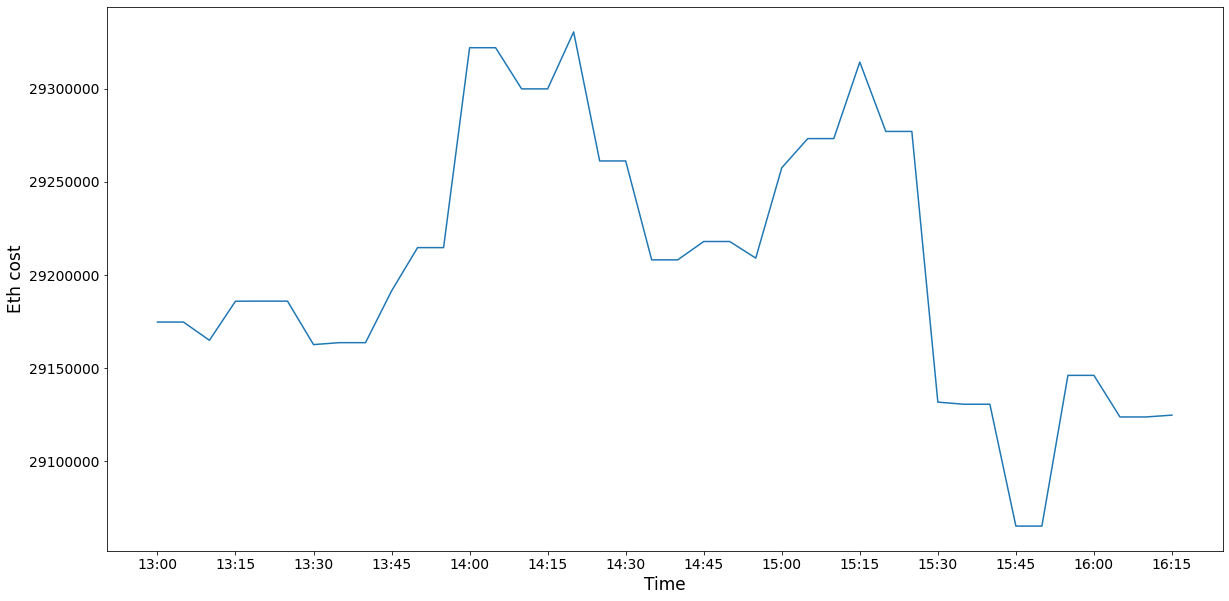

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(timeline, eth_values)

# Making plot bigger

plt.xlabel('Time',fontsize=17)
plt.ylabel('Eth cost',fontsize=17)
ax.ticklabel_format(style='plain',axis='y')


plt.xticks(pd.date_range("13:00", "16:15", freq="15min").strftime('%H:%M'),fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('foo.png')
plt.show()